# Introduction

In this notebook, we are only considering the second raw dataset "expenses.csv" for future development.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_load = "../../data/"

In [3]:
file_name = "raw/expenses.csv"
full_path = path_load + file_name
data = pd.read_csv(full_path,parse_dates =["date"])
# data['date']  = pd.to_datetime(data['date']) otra opción si no se aplicara parse_dates

In [4]:
data.head()

,id,cost,category,subcategory,created at,date
0,41309,4800,Transporte,Bus/Metrolinea,2023-06-30T00:48:15.669Z,2023-06-29 00:00:00+00:00
1,41308,80000,Vestuario,Ropa,2023-06-30T00:47:46.593Z,2023-06-29 00:00:00+00:00
2,41307,8000,Alimentación,Desayunos y cenas,2023-06-29T19:13:34.270Z,2023-06-29 00:00:00+00:00
3,41306,9550,Alimentación,Onces,2023-06-29T19:10:29.832Z,2023-06-29 00:00:00+00:00
4,41305,3980,Aseo y cuidado personal,Artículos aseo personal,2023-06-29T19:09:24.961Z,2023-06-29 00:00:00+00:00


In [5]:
data.describe()

,id,cost
count,3618.000000,3.618000e+03
mean,26150.033444,2.152545e+04
std,13118.162323,8.344430e+04
min,1734.000000,1.500000e+02
25%,13576.500000,3.400000e+03
50%,27779.000000,5.500000e+03
75%,39875.750000,1.200000e+04
max,41309.000000,2.031520e+06


In [6]:
grouped_date = data.groupby("date")

In [7]:
grouped_date.groups

{2021-07-01 00:00:00+00:00: [3616, 3617], 2021-07-13 00:00:00+00:00: [3615], 2021-07-16 00:00:00+00:00: [3614], 2021-07-17 00:00:00+00:00: [3611, 3612, 3613], 2021-07-19 00:00:00+00:00: [3610], 2021-07-20 00:00:00+00:00: [3598, 3599, 3600, 3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609], 2021-07-22 00:00:00+00:00: [3597], 2021-07-23 00:00:00+00:00: [3596], 2021-07-30 00:00:00+00:00: [3593, 3594, 3595], 2021-07-31 00:00:00+00:00: [3583, 3584, 3585, 3586, 3587, 3588, 3589, 3590, 3591, 3592], 2021-08-01 00:00:00+00:00: [3576, 3577, 3578, 3579, 3580, 3581, 3582], 2021-08-02 00:00:00+00:00: [3573, 3574, 3575], 2021-08-03 00:00:00+00:00: [3570, 3571, 3572], 2021-08-04 00:00:00+00:00: [3567, 3568, 3569], 2021-08-05 00:00:00+00:00: [3561, 3562, 3563, 3564, 3565, 3566], 2021-08-06 00:00:00+00:00: [3551, 3552, 3553, 3554, 3555, 3556, 3557, 3558, 3559, 3560], 2021-08-07 00:00:00+00:00: [3547, 3548, 3549, 3550], 2021-08-08 00:00:00+00:00: [3537, 3538, 3539, 3540, 3541, 3542, 3543, 3544, 3545

In [8]:
data.dtypes

id                           int64
cost                         int64
category                    object
subcategory                 object
created at                  object
date           datetime64[ns, UTC]
dtype: object

# Muestrar por mes

In [9]:
resample_date = data.resample('1M', on='date').cost.sum()
resample_date

date
2021-07-31 00:00:00+00:00    1854810
2021-08-31 00:00:00+00:00    2949470
2021-09-30 00:00:00+00:00    2449092
2021-10-31 00:00:00+00:00    3269372
2021-11-30 00:00:00+00:00    3143335
2021-12-31 00:00:00+00:00    4119692
2022-01-31 00:00:00+00:00    3121610
2022-02-28 00:00:00+00:00    2049788
2022-03-31 00:00:00+00:00    2947435
2022-04-30 00:00:00+00:00    2756124
2022-05-31 00:00:00+00:00    3475179
2022-06-30 00:00:00+00:00    4345208
2022-07-31 00:00:00+00:00    3511116
2022-08-31 00:00:00+00:00    3591612
2022-09-30 00:00:00+00:00    4082624
2022-10-31 00:00:00+00:00    5296946
2022-11-30 00:00:00+00:00    4466767
2022-12-31 00:00:00+00:00    2901875
2023-01-31 00:00:00+00:00    2962677
2023-02-28 00:00:00+00:00    2505194
2023-03-31 00:00:00+00:00    2882122
2023-04-30 00:00:00+00:00    3245723
2023-05-31 00:00:00+00:00    3359652
2023-06-30 00:00:00+00:00    2591666
Freq: M, Name: cost, dtype: int64

In [10]:
x = resample_date.index
y = resample_date.values

In [11]:
print('Promedio gastos mensual:', y.mean())

Promedio gastos mensual: 3244962.0416666665


In [12]:
x

DatetimeIndex(['2021-07-31 00:00:00+00:00', '2021-08-31 00:00:00+00:00',
               '2021-09-30 00:00:00+00:00', '2021-10-31 00:00:00+00:00',
               '2021-11-30 00:00:00+00:00', '2021-12-31 00:00:00+00:00',
               '2022-01-31 00:00:00+00:00', '2022-02-28 00:00:00+00:00',
               '2022-03-31 00:00:00+00:00', '2022-04-30 00:00:00+00:00',
               '2022-05-31 00:00:00+00:00', '2022-06-30 00:00:00+00:00',
               '2022-07-31 00:00:00+00:00', '2022-08-31 00:00:00+00:00',
               '2022-09-30 00:00:00+00:00', '2022-10-31 00:00:00+00:00',
               '2022-11-30 00:00:00+00:00', '2022-12-31 00:00:00+00:00',
               '2023-01-31 00:00:00+00:00', '2023-02-28 00:00:00+00:00',
               '2023-03-31 00:00:00+00:00', '2023-04-30 00:00:00+00:00',
               '2023-05-31 00:00:00+00:00', '2023-06-30 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', freq='M')

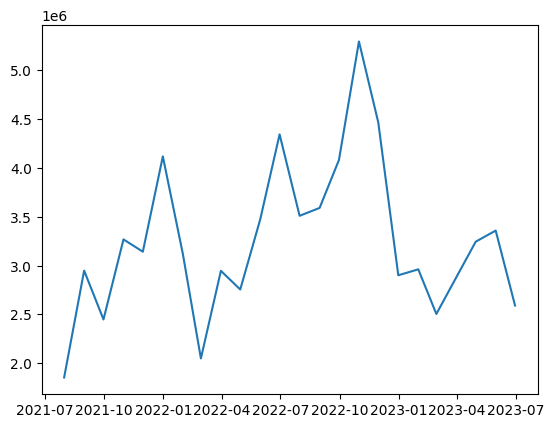

In [13]:
#plt.plot(kind="scatter", x=x, y=y)
plt.plot(x, y)

# Agregando diás festivos al datasets

In [14]:
from datetime import date
import holidays

In [15]:
co_holidays = holidays.CO()

In [16]:
a = holidays.CO(years = 2022)
a[2].index

<function str.index>

In [17]:
# count holidays in a month
def count_holidays_in_month(x):
    print(x)
    year= x.year
    myMonth =  x.month
    cant_holidays = 0
    for ptr in holidays.CO(years = year).items():
        if ptr[0].month == myMonth:
            cant_holidays+= 1
    return cant_holidays

In [18]:
df=pd.DataFrame()

In [19]:
df['costs'] = resample_date.values

In [20]:
df.index = resample_date.index
df.head()

,costs
date,
2021-07-31 00:00:00+00:00,1854810
2021-08-31 00:00:00+00:00,2949470
2021-09-30 00:00:00+00:00,2449092
2021-10-31 00:00:00+00:00,3269372
2021-11-30 00:00:00+00:00,3143335


In [21]:
df['holidays'] = df.index.to_series().apply(count_holidays_in_month)

DatetimeIndex(['2021-07-31 00:00:00+00:00', '2021-08-31 00:00:00+00:00',
               '2021-09-30 00:00:00+00:00', '2021-10-31 00:00:00+00:00',
               '2021-11-30 00:00:00+00:00', '2021-12-31 00:00:00+00:00',
               '2022-01-31 00:00:00+00:00', '2022-02-28 00:00:00+00:00',
               '2022-03-31 00:00:00+00:00', '2022-04-30 00:00:00+00:00',
               '2022-05-31 00:00:00+00:00', '2022-06-30 00:00:00+00:00',
               '2022-07-31 00:00:00+00:00', '2022-08-31 00:00:00+00:00',
               '2022-09-30 00:00:00+00:00', '2022-10-31 00:00:00+00:00',
               '2022-11-30 00:00:00+00:00', '2022-12-31 00:00:00+00:00',
               '2023-01-31 00:00:00+00:00', '2023-02-28 00:00:00+00:00',
               '2023-03-31 00:00:00+00:00', '2023-04-30 00:00:00+00:00',
               '2023-05-31 00:00:00+00:00', '2023-06-30 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)
2021-07-31 00:00:00+00:00
2021-08-31 00:00:00+00:00
2021-09-30 00:00:

In [22]:
df.head()

,costs,holidays
date,,
2021-07-31 00:00:00+00:00,1854810,2
2021-08-31 00:00:00+00:00,2949470,2
2021-09-30 00:00:00+00:00,2449092,0
2021-10-31 00:00:00+00:00,3269372,1
2021-11-30 00:00:00+00:00,3143335,2


In [23]:
# Crear el datasets
directory = path_load + 'processed'
file_df_name = '/summaryCosts.csv'
df.to_csv(directory+file_df_name,index=False)